In [98]:
%load_ext autoreload 
%autoreload 2
from utils import load_data
from config import PARSED_DATA_PATH, CANDIDATE_CVS_PATH, REVERSE_MATCHING_PATH
from visualize import plot_skills_frequency, plot_skills_per_category, plot_top_skills_for_job_title
from gender_analysis import get_skill_distribution_by_gender, get_skill_gender_share
import polars as pl 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [99]:
cv_skills = load_data(PARSED_DATA_PATH)

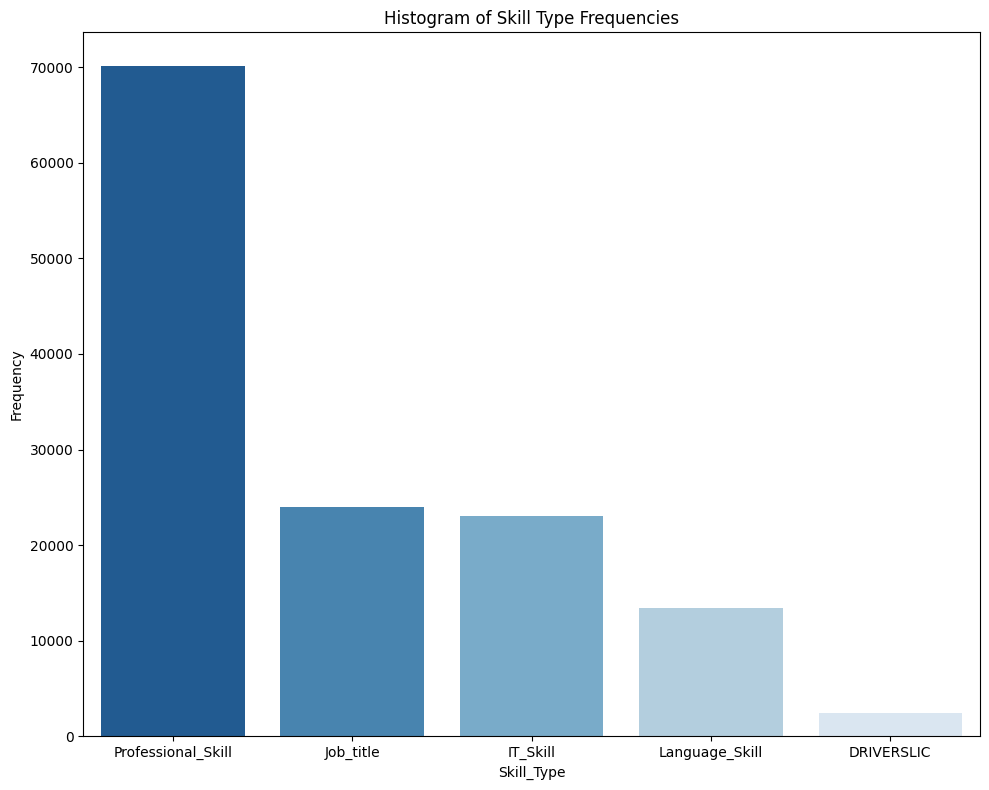

In [100]:
plot_skills_frequency(cv_skills)

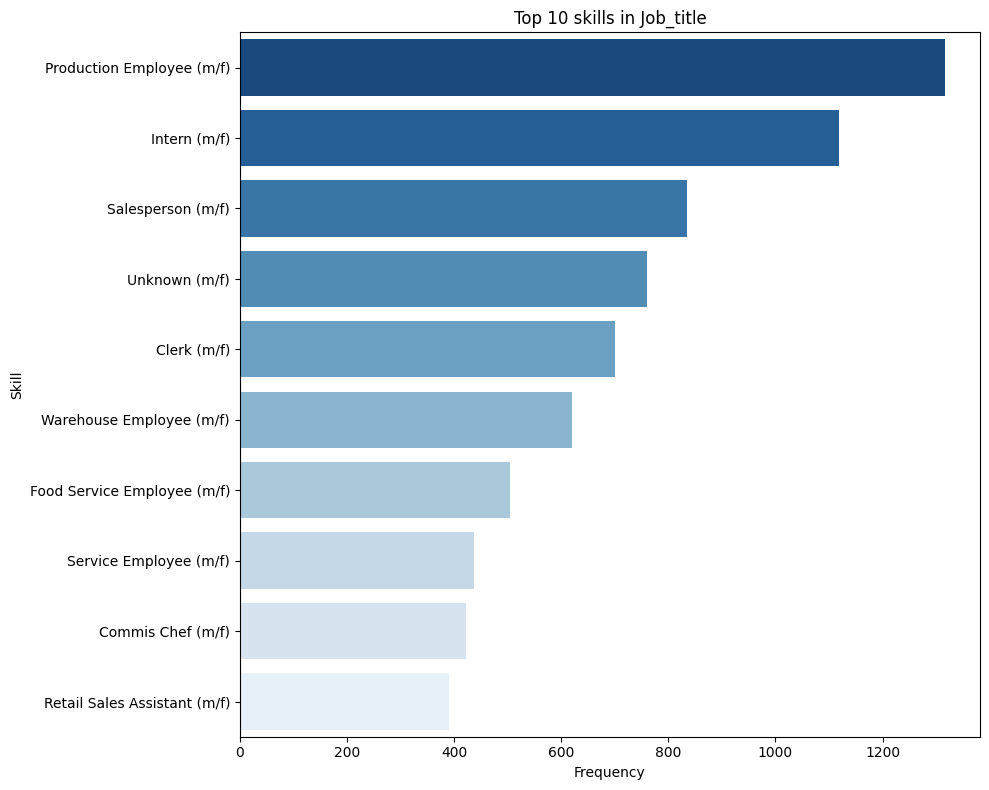

In [101]:
skill_pd = plot_skills_per_category(cv_skills,'Job_title',top_n=10)

In [102]:
missing_skills_df = cv_skills.filter(cv_skills["Skill"].is_null())
missing_skills_df

CANDIDATE_ID,Skill,Skill_Type
i64,str,str
7747553,null,"""DRIVERSLIC"""
7583771,null,"""DRIVERSLIC"""
7527802,null,"""DRIVERSLIC"""
7484890,null,"""DRIVERSLIC"""
7456557,null,"""DRIVERSLIC"""
…,…,…
124012,null,"""DRIVERSLIC"""
123094,null,"""DRIVERSLIC"""
117943,null,"""DRIVERSLIC"""


In [103]:
job_titles_df = cv_skills.filter(pl.col("Skill_Type") == "Job_title")
job_titles_df

CANDIDATE_ID,Skill,Skill_Type
i64,str,str
7990324,"""Dental Assistant (m/f)""","""Job_title"""
7990324,"""General Labourer (other) (m/f)""","""Job_title"""
7990324,"""Intern (m/f)""","""Job_title"""
7974050,"""Clerk (m/f)""","""Job_title"""
7974050,"""General Labourer (other) (m/f)""","""Job_title"""
…,…,…
18828,"""Technical Employee (m/f)""","""Job_title"""
18828,"""Warehouse Employee (m/f)""","""Job_title"""
18233,"""Apprentice (m/f)""","""Job_title"""


In [104]:
job_titles_df = job_titles_df.select(["CANDIDATE_ID", "Skill"]).rename({"Skill": "Job_title"})
candidate_skills = cv_skills.filter(pl.col("Skill_Type") != "Job_title").select(["CANDIDATE_ID", "Skill"])
job_title_skills = job_titles_df.join(candidate_skills, on="CANDIDATE_ID", how="inner")
job_title_skills

CANDIDATE_ID,Job_title,Skill
i64,str,str
7990324,"""Dental Assistant (m/f)""","""Computer Literacy"""
7990324,"""General Labourer (other) (m/f)""","""Computer Literacy"""
7990324,"""Intern (m/f)""","""Computer Literacy"""
7990324,"""Dental Assistant (m/f)""","""Italian"""
7990324,"""General Labourer (other) (m/f)""","""Italian"""
…,…,…
18233,"""Production Employee (m/f)""","""Sales"""
18233,"""Train Conductor (m/f)""","""Sales"""
18233,"""Apprentice (m/f)""","""Telecommunications"""


In [105]:
job_skill_frequency = (
    job_title_skills
    .group_by(["Job_title", "Skill"])
    .agg(pl.len().alias("Frequency"))
    .sort("Frequency", descending=True)
)
job_skill_frequency

Job_title,Skill,Frequency
str,str,u32
"""Production Employee (m/f)""","""Italian""",1052
"""Intern (m/f)""","""Italian""",946
"""Salesperson (m/f)""","""Italian""",693
"""Unknown (m/f)""","""Italian""",632
"""Clerk (m/f)""","""Italian""",597
…,…,…
"""Customer Adviser (m/f)""","""Commercial Management""",1
"""Vice-President (m/f)""","""Light-Emitting Diode""",1
"""Business Development Manager (…","""Governance""",1


In [106]:
candidate_skills = job_skill_frequency.filter(pl.col("Job_title") == "Production Employee (m/f)")
candidate_skills

Job_title,Skill,Frequency
str,str,u32
"""Production Employee (m/f)""","""Italian""",1052
"""Production Employee (m/f)""","""English""",469
"""Production Employee (m/f)""","""Cleaning of Buildings and Prem…",406
"""Production Employee (m/f)""","""Microsoft Office""",392
"""Production Employee (m/f)""","""Assembly and Installation""",348
…,…,…
"""Production Employee (m/f)""","""Transplanting""",1
"""Production Employee (m/f)""","""Volleyball""",1
"""Production Employee (m/f)""","""Coffee Making""",1


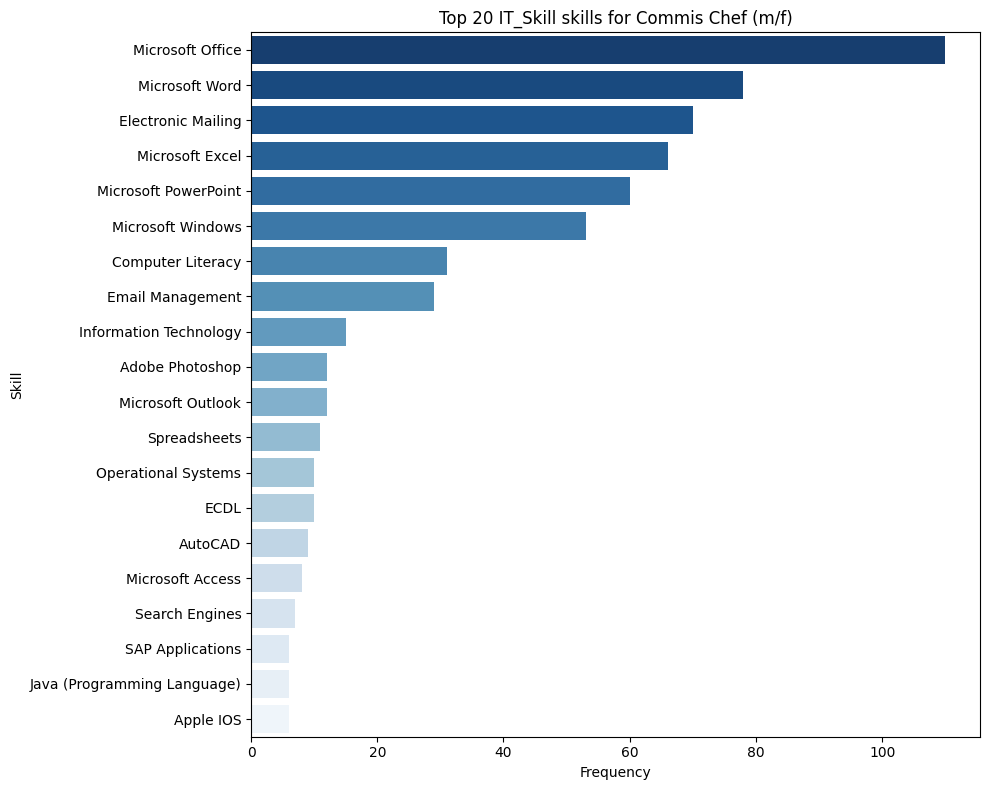

In [107]:
plot_top_skills_for_job_title(cv_skills,"Commis Chef (m/f)", "IT_Skill", top_n=20)

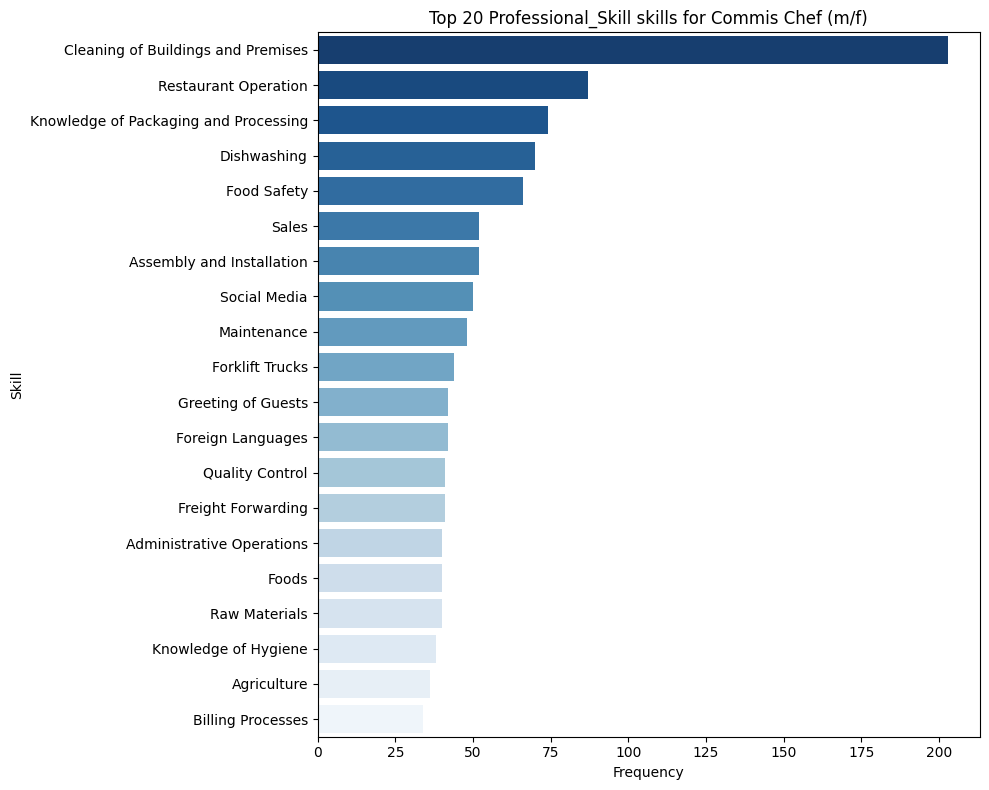

In [108]:
plot_top_skills_for_job_title(cv_skills,"Commis Chef (m/f)", "Professional_Skill", top_n=20)

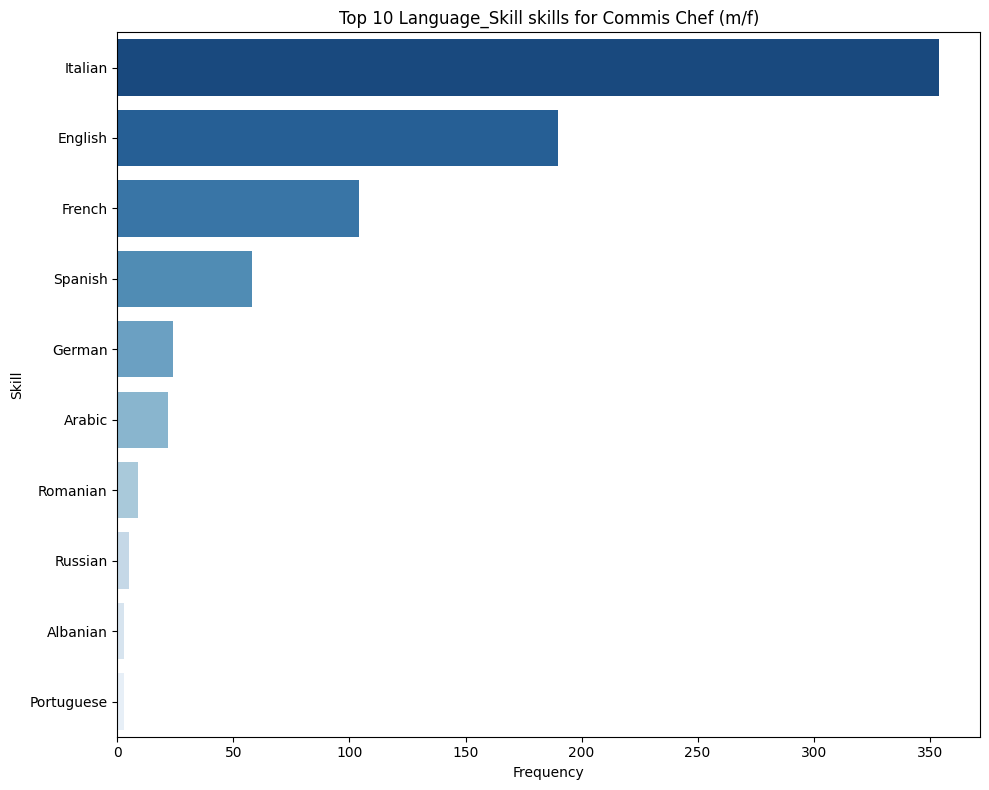

In [109]:
plot_top_skills_for_job_title(cv_skills,"Commis Chef (m/f)", "Language_Skill", top_n=10)

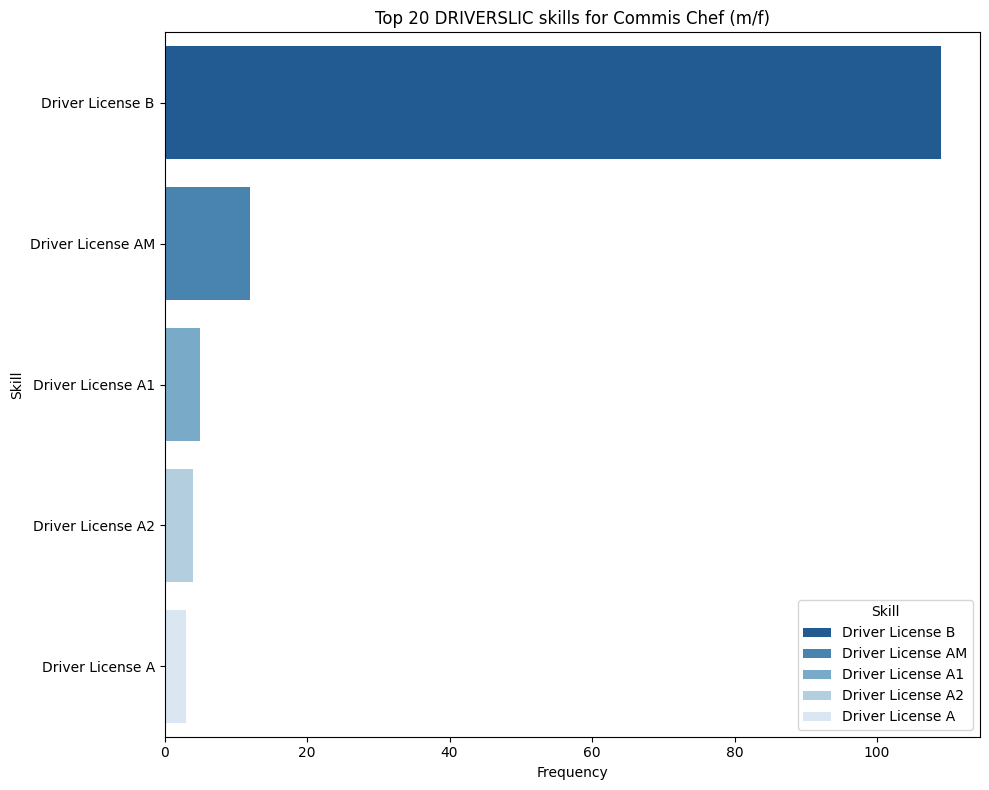

In [110]:
plot_top_skills_for_job_title(cv_skills,"Commis Chef (m/f)", "DRIVERSLIC", top_n=20)